## 1. Install dan Import EasyOCR dan library lainnya

In [1]:
pip install torch torchvision torchaudio

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install easyocr

  Using cached opencv_python_headless-4.5.4.60-cp38-cp38-win_amd64.whl (35.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [33]:
import easyocr
import cv2
import matplotlib.pyplot as plt
import numpy as np

## 2. Membaca Teks dari Gambar dan Video

In [43]:
IMAGE_PATH = 'car12.jpg'

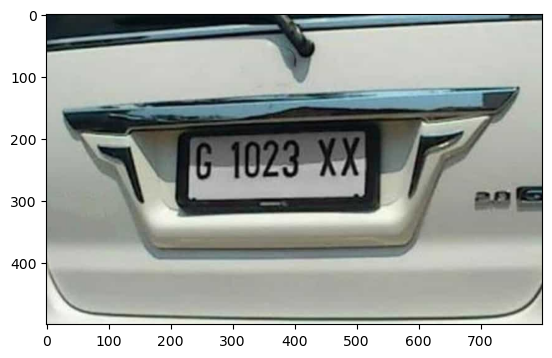

In [44]:
img = cv2.imread(IMAGE_PATH)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [45]:
reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(IMAGE_PATH)
result

Using CPU. Note: This module is much faster with a GPU.


[([[233, 185], [525, 185], [525, 275], [233, 275]],
  '6 1023 XX',
  0.533433858056473)]

## 3. Munculkan hasil deteksi teks dalam gambar

In [46]:
atas_kiri = tuple(result[0][0][0])
bawah_kanan = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

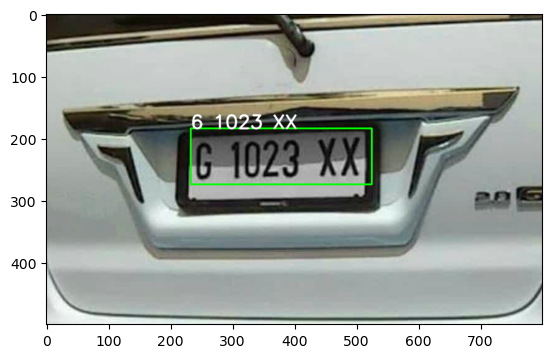

In [56]:
img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img, atas_kiri, bawah_kanan, (0,255,0), 2)
img = cv2.putText(img, text, atas_kiri, font, 1, (255, 255, 255), 2, cv2.LINE_AA)
plt.imshow(img)
plt.show()

## 4. Deteksi beberapa baris teks

In [57]:
IMAGE_PATH = 'plat_dinas.jpg'

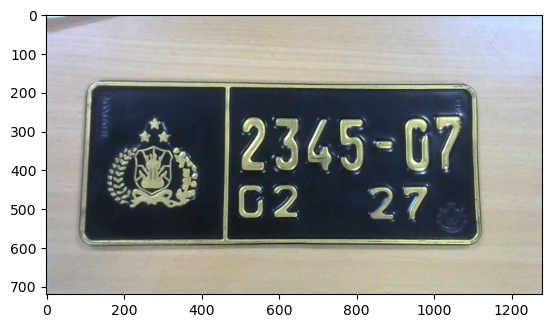

In [58]:
img = cv2.imread(IMAGE_PATH)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [59]:
reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(IMAGE_PATH)
result

Using CPU. Note: This module is much faster with a GPU.


[([[484, 244], [1093, 244], [1093, 424], [484, 424]],
  '2345-07',
  0.995403623009581),
 ([[487, 423], [663, 423], [663, 537], [487, 537]], '62', 0.7725899447702176),
 ([[814, 418], [1003, 418], [1003, 550], [814, 550]],
  '27',
  0.9999996628252286)]

In [67]:
result[0]

([[484, 244], [1093, 244], [1093, 424], [484, 424]],
 '2345-07',
 0.995403623009581)

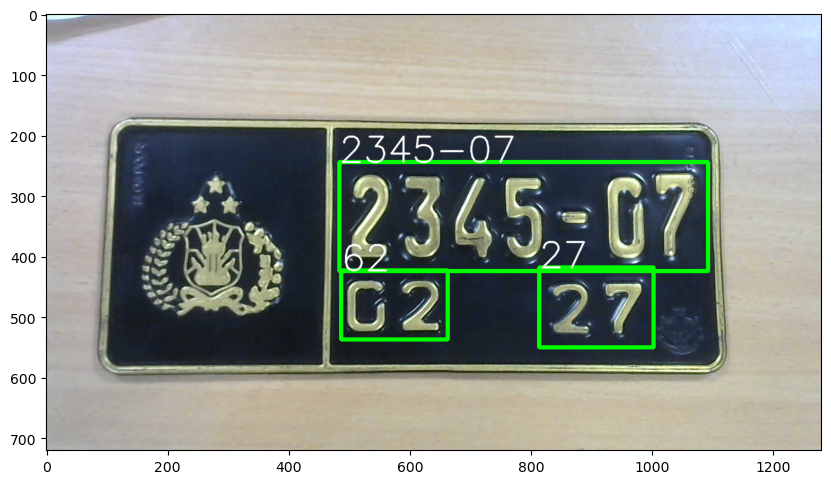

In [68]:
img = cv2.cvtColor(cv2.imread(IMAGE_PATH), cv2.COLOR_BGR2RGB)
for detection in result:
    atas_kiri = tuple([int(val) for val in detection[0][0]])
    bawah_kanan = tuple([int(val) for val in detection[0][2]])
    text = detection[1]
    font = cv2.FONT_HERSHEY_SIMPLEX
    img = cv2.rectangle(img, atas_kiri, bawah_kanan, (0, 255, 0), 5)
    img = cv2.putText(img, text, atas_kiri, font, 2, (255, 255, 255), 2, cv2.LINE_AA)

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.show()